In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sb

In [ ]:
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_data = pd.read_html(sp500_url)
sp500_table = sp500_data[0]
sp500_symbols = sp500_table['Symbol'].tolist()
selected_symbols = sp500_symbols[:10]  # Choose the first 10 symbols
selected_symbols

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADM', 'ADBE', 'ADP', 'AES', 'AFL']

In [ ]:
def get_stock_data(tickers, start_date, end_date):
    data = pd.DataFrame()
    for ticker in tickers:
        stock = yf.download(ticker, start=start_date, end=end_date)
        data[ticker] = stock['Adj Close']
    return data

In [ ]:
start_date = '2022-01-01'
end_date = '2022-12-31'

In [ ]:
stock_data = get_stock_data(selected_symbols,start_date,end_date)
stock_data.isna().sum()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MMM     0
AOS     0
ABT     0
ABBV    0
ACN     0
ADM     0
ADBE    0
ADP     0
AES     0
AFL     0
dtype: int64

<Axes: >

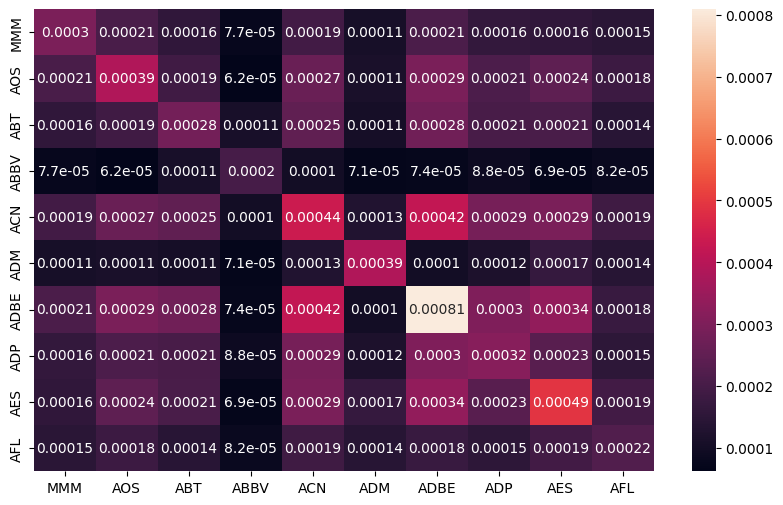

In [ ]:
daily_returns = stock_data.pct_change().dropna()
cov_matrix = daily_returns.cov()
plt.figure(figsize=(10,6))
sb.heatmap(cov_matrix, annot=True)

In [ ]:
# Scaling the data
scaled_data = daily_returns.apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()))
scaled_data.head()

,MMM,AOS,ABT,ABBV,ACN,ADM,ADBE,ADP,AES,AFL
Date,,,,,,,,,,
2022-01-04,0.887000,0.907381,-1.354612,-0.203873,-0.274322,0.866967,-0.587820,0.253423,0.083694,2.133056
2022-01-05,-0.165426,-0.785079,-0.223340,0.303809,-0.775436,-0.474855,-2.453069,-0.486067,-2.112271,-0.182739
2022-01-06,-0.409186,0.403431,0.035008,-0.401362,-2.244608,0.374967,0.037023,-0.393353,-0.219849,1.171294
2022-01-07,0.709571,-0.510110,0.228597,-0.251150,-0.850582,0.356273,-0.175672,-0.600294,-0.317574,0.994915
2022-01-10,-0.746931,-0.095494,-0.087800,0.724359,0.358511,0.009999,1.099836,-1.404270,-0.319232,0.740304


<Axes: >

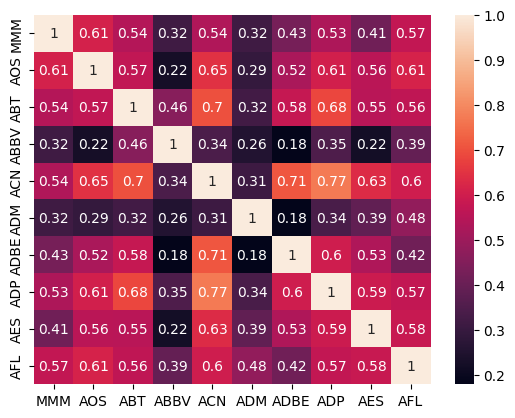

In [ ]:
sb.heatmap(scaled_data.cov(), annot=True)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(scaled_data.cov())

In [ ]:
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:,sorted_index]
rounded_eigenvectors = rounded_numbers = np.round(sorted_eigenvectors, 3)

In [ ]:
three_components = rounded_eigenvectors[:,0:3].transpose()
print("First 3 PCA components are: ", rounded_eigenvectors)

First 3 PCA components are:  [[ 0.308 -0.078 -0.001  0.693 -0.309 -0.211  0.469  0.105  0.212 -0.048]
 [ 0.337  0.147  0.153  0.415  0.206  0.131 -0.452 -0.632 -0.03   0.073]
 [ 0.353  0.007 -0.271 -0.107 -0.122  0.245  0.335 -0.136 -0.765  0.018]
 [ 0.202 -0.557 -0.682 -0.115  0.147 -0.211 -0.117 -0.183  0.237  0.035]
 [ 0.373  0.213 -0.084 -0.163 -0.082  0.128 -0.156  0.128  0.17  -0.83 ]
 [ 0.211 -0.578  0.55  -0.289 -0.447 -0.005 -0.07  -0.178  0.008 -0.022]
 [ 0.309  0.441 -0.084 -0.247 -0.358 -0.604 -0.239  0.048 -0.032  0.297]
 [ 0.36   0.124 -0.084 -0.143 -0.113  0.625  0.013  0.221  0.411  0.453]
 [ 0.324  0.098  0.286 -0.317  0.575 -0.225  0.508 -0.171  0.182  0.028]
 [ 0.337 -0.253  0.181  0.177  0.383 -0.102 -0.324  0.639 -0.283  0.082]]


In [ ]:
# Calculate the total variance
total_variance = np.sum(eigenvalues)
# Calculate the variance explained by each principal component
variance_explained = 100*(eigenvalues / total_variance)
# Print the variance explained by the first three principal components
print("Variance Explained by PC1:", round((variance_explained[0]),2), "%")
print("Variance Explained by PC2:", round((variance_explained[1]),2), "%")
print("Variance Explained by PC3:", round((variance_explained[2]),2), "%")

Variance Explained by PC1: 54.66 %
Variance Explained by PC2: 10.31 %
Variance Explained by PC3: 8.37 %


In [ ]:
total_expalined_variance = (sum(sorted_eigenvalues[:3])/sum(sorted_eigenvalues))*100
print("Percentage of variance explained by the first 3 PCA components: ", round((total_expalined_variance),2),"%")

Percentage of variance explained by the first 3 PCA components:  73.34 %


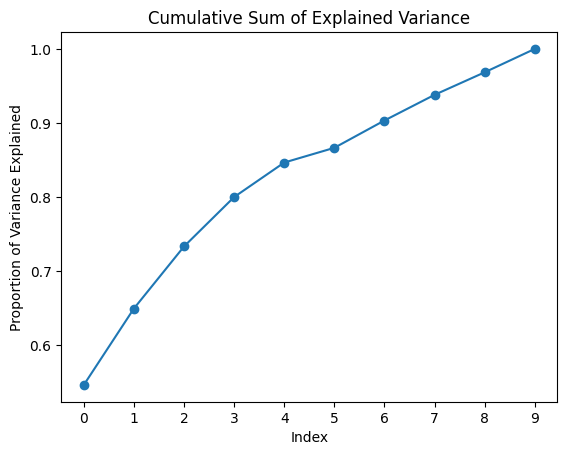

In [ ]:
cumulative_sum = [sum(variance_explained[:i + 1]) / sum(variance_explained) for i in range(len(variance_explained))]

plt.plot(cumulative_sum, marker='o')
plt.title('Cumulative Sum of Explained Variance')
plt.xlabel('Index')
x_values = range(0, len(variance_explained))
plt.xticks(x_values)
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
reduced_data = np.dot(sorted_eigenvectors[:,0:3].transpose() , daily_returns.to_numpy().transpose()).transpose()
reduced_data

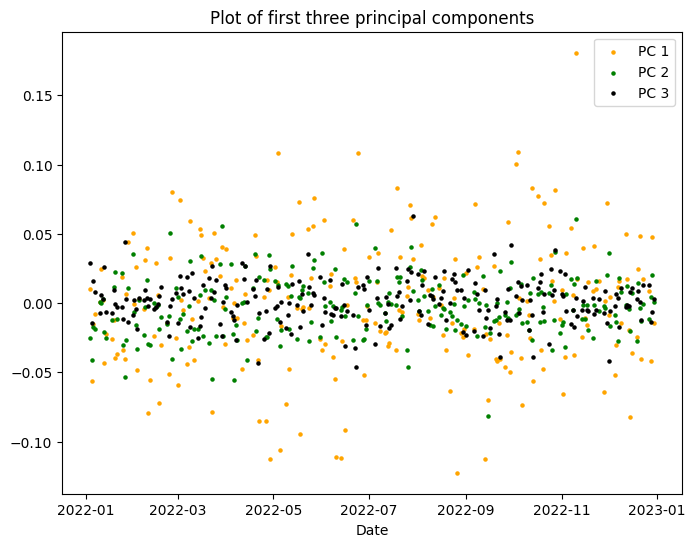

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(daily_returns.index,reduced_data[:,0], color='orange', label='PC 1', s=5)
plt.scatter(daily_returns.index,reduced_data[:,1], color='green', label='PC 2',s=5)
plt.scatter(daily_returns.index,reduced_data[:,2], color='black', label='PC 3',s=5)
plt.xlabel("Date")
plt.title("Plot of first three principal components")
plt.legend()
plt.show()